# Importing required Libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from geopandas.tools import geocode
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [158]:
# plotly for offline use
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Utility Functions

In [159]:
def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if(i>=start and i<=end):
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke','royalblue'])
    ax.set_title(title, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()

In [160]:
def plot_barh(col):
    
    temp_df = new.sort_values(col, ascending=False).head(15)
    temp_df = temp_df[temp_df[col]!=0]
    
    hover_data = ['Confirmed', 'Deaths']
    
    fig =  px.bar(temp_df, y='Country/Region', x=col, orientation='h', color='Country/Region', 
                  text=col, title=col, width=700, hover_data = hover_data,
                  color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_traces(textposition='auto')
    fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False,
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [161]:
def plot_pie(col1, col2, title, pal):

    temp = new[[col1, col2]].sum()
    temp = pd.DataFrame(temp).reset_index()
    temp.columns = ['Column', 'Value']
    
    fig = px.sunburst(temp, path=['Column'], values='Value',
                      color_discrete_sequence=pal, title=title)
    fig.data[0].textinfo = 'label+text+value+percent root'
    fig.show()

# Dataset

### Import files

In [162]:
# importing daywise dataset
df = pd.read_csv('/Users/pranjal27bhardwaj/Desktop/covid/datasets/day_wise.csv', parse_dates=['Date'])
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [163]:
# day wise data
day_wise = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'].sum()
# reset index
day_wise = day_wise.reset_index()
day_wise.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,14,13,2.64,2.46,107.69,13


In [164]:
# importing summary dataset
latest = pd.read_csv('/Users/pranjal27bhardwaj/Desktop/covid/datasets/full_grouped.csv')

# first few rows
latest.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


In [165]:
# importing summary dataset
new = pd.read_csv('/Users/pranjal27bhardwaj/Desktop/covid/datasets/country_wise_latest.csv')

# first few rows
new.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,32022,807,16041,15174,186,33,390,2.52,50.09,5.03,30175,1847,6.12,Eastern Mediterranean
1,Albania,2662,69,1559,1034,82,4,43,2.59,58.56,4.43,2192,470,21.44,Europe
2,Algeria,14657,928,10342,3387,385,8,302,6.33,70.56,8.97,12445,2212,17.77,Africa
3,Andorra,855,52,800,3,0,0,1,6.08,93.57,6.50,855,0,0.00,Europe
4,Angola,315,17,97,201,24,2,0,5.40,30.79,17.53,212,103,48.58,Africa
5,Antigua and Barbuda,69,3,23,43,0,0,1,4.35,33.33,13.04,65,4,6.15,Americas
6,Argentina,69941,1385,24186,44370,2744,34,1146,1.98,34.58,5.73,52457,17484,33.33,Americas
7,Armenia,26658,459,15036,11163,593,6,473,1.72,56.40,3.05,22488,4170,18.54,Europe
8,Australia,8066,104,7130,832,65,0,40,1.29,88.40,1.46,7595,471,6.20,Western Pacific
9,Austria,17941,705,16514,722,68,0,23,3.93,92.05,4.27,17477,464,2.65,Europe


In [166]:
# load countries map
world_map = gpd.read_file('/Users/pranjal27bhardwaj/Desktop/sars/Humandevelopemnt/countries.geojson')
# avoid Antartica
world_map = world_map[world_map['name']!='Antarctica']
# select only important columns
world_map = world_map[['name', 'continent', 'geometry']]
# first few rows
world_map.head()

,name,continent,geometry
0,Aruba,North America,"POLYGON ((-69.89912 12.45200, -69.89570 12.423..."
1,Afghanistan,Asia,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,Angola,Africa,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,Anguilla,North America,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,Albania,Europe,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."


## SARS (Severe Acute Respiratory Syndrome)

### Cause
> * SARS coronavirus (SARS-CoV) – virus identified in **2003**. 
> * SARS-CoV is thought to be an animal virus from an as-yet-uncertain animal reservoir, perhaps **bats**, that spread to other animals (**civet cats**)
> * It spread worldwide within a few months, although it was quickly contained. 
> * SARS is a virus transmitted through droplets that enter the air when someone with the disease coughs, sneezes or       talks. 
> * No known transmission has occurred since 2004.
> * It was first infected humans in the **Guangdong province of southern China** in **2002**.

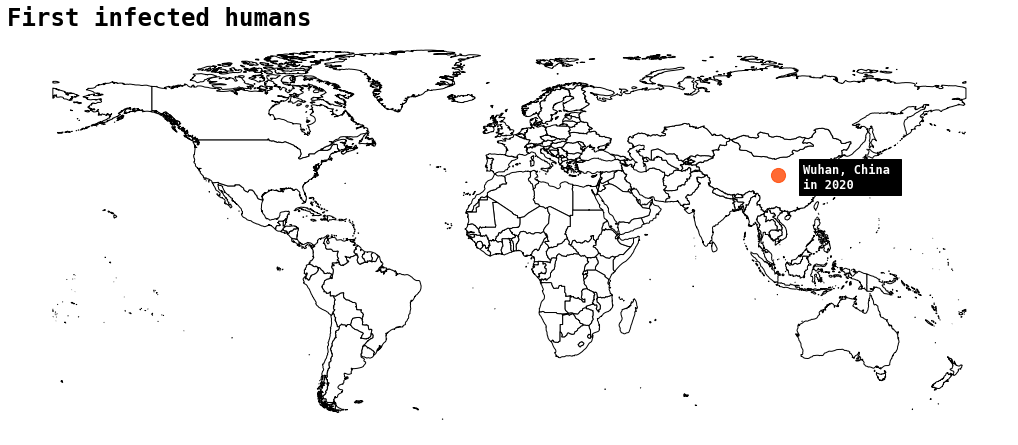

In [167]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.set_style('whitegrid')

world_map.plot(ax=ax, color='white', edgecolor='black', alpha=1)
ax.set_title('First infected humans', 
             loc='left', fontdict={'fontsize': 24, 
                                   'fontfamily': 'monospace', 
                                   'fontweight': 'bold',
                                   'color': 'black'})

ax.scatter(105.7633, 35.3790, color='orangered', s=200, alpha=0.8)
ax.text(115.7633, 30.3790, 'Wuhan, China \nin 2020', 
        fontfamily='monospace', fontsize=12, fontweight='bold',
        color='white', backgroundcolor='black')

ax.set_axis_off()

### Transmission
> * Transmission of SARS-CoV is primarily from person to person. 
> * It appears to have occurred mainly during the second week of illness, which corresponds to the peak of virus excretion in respiratory secretions and stool, and when cases with severe disease start to deteriorate clinically. 
> * Most cases of human-to-human transmission occurred in the health care setting, in the absence of adequate infection control precautions. 
> * Implementation of appropriate infection control practices brought the global outbreak to an end.

### Symptoms
> * Influenza-like and include fever
> * Malaise
> * Myalgia
> * Headache
> * Diarrhoea, and
> * Shivering (rigors). 

### Nature of the disease
> * No individual symptom or cluster of symptoms has proved to be specific for a diagnosis of SARS. 
> * Although fever is the most frequently reported symptom, it is sometimes absent on initial measurement, especially in elderly and immunosuppressed patients.
> * Cough (initially dry), shortness of breath, and diarrhoea are present in the first and/or second week of illness. 
> * Severe cases often evolve rapidly, progressing to respiratory distress and requiring intensive care.

### Vaccines
> * None. Experimental vaccines are under development.

### Incubation period (time interval from infection with the virus to onset of symptoms)
> * Incubation period of SARS-CoV is from 2 to 7 days. 
> * A person infected with SARS-CoV cannot spread the disease until they develop symptoms.

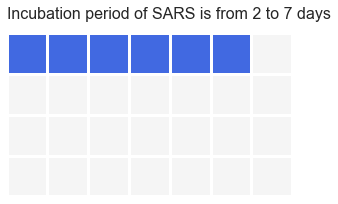

In [168]:
plot_cal('Incubation period of SARS is from 2 to 7 days', 1, 6)

### Geographical distribution
> * The disease appeared in November 2002 in the Guangdong province of southern China. 
> * This area is considered as a potential zone of re-emergence of SARS-CoV.
> * SARS-CoV affected 26 countries and resulted in more than 8000 cases in 2003

In [169]:
fig = px.choropleth(new, locations="Country/Region", locationmode='country names',
                    color="Confirmed", hover_name="Country/Region", 
                    color_continuous_scale="Sunset", 
                    title='Choropleth map cumulative no. of cases')
fig.update(layout_coloraxis_showscale=True)
fig.show()

# EDA

## Country wise summary

In [170]:
plot_barh('Confirmed')

### Recovered cases

In [171]:
plot_barh('Recovered')

In [174]:
plot_barh('Deaths')

In [172]:
plot_barh('Deaths / 100 Cases')

# Day wise

In [175]:
def plot_daywise(col, hue):
    temp = day_wise[day_wise['Date'] > '2020-01-22']
    fig = px.area(temp, x="Date", y=col, width=700, 
                  color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [196]:
def plot_stacked(col):
    temp = latest[latest['Date'] > '2020-01-22']
    fig = px.area(temp, x="Date", y=col, color='Country/Region', 
                 height=600, title=col, 
                 color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

In [178]:
plot_daywise('Confirmed', 'black')

In [179]:
plot_daywise('Deaths', 'orangered')

In [180]:
plot_daywise('Recovered', 'limegreen')

In [ ]:
plot_daywise('Active', 'crimson')

In [197]:
plot_stacked('Confirmed')

In [ ]:
plot_stacked('Deaths')

In [ ]:
plot_stacked('Recovered')

In [ ]:
plot_stacked('Active')

In [ ]:
# temp = df.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
# temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
#                  var_name='Case', value_name='Count')
# temp.head()

# # fig = px.area(temp, x="Date", y="Count", color='Case', 
#               height=600, width=700, title='Cases over time', 
#               color_discrete_sequence = ['limegreen', 'crimson', 'black'])
# fig.update_layout(xaxis_rangeslider_visible=True)
# fig.show()

In [ ]:
temp = latest[['Country/Region', 'Cumulative male cases', 'Cumulative female cases']]
temp['% Male'] = temp['Cumulative male cases']*100/(temp['Cumulative male cases']+temp['Cumulative female cases'])
temp['% Female'] = temp['Cumulative female cases']*100/(temp['Cumulative male cases']+temp['Cumulative female cases'])
temp.head()

In [ ]:
temp1 = temp.melt(id_vars='Country/Region', 
                 value_vars=['Cumulative male cases', 'Cumulative female cases'], 
                 var_name='Case', value_name='Count')
temp1 = temp1.sort_values(['Count'], ascending=True)


fig = px.bar(temp1, x='Count', y='Country/Region', color='Case', 
             opacity=1, orientation='h', height=600,
             barmode='stack',
             color_discrete_sequence=['indigo', 'deeppink'])
fig.update_layout(title='No. of case based on Gender', xaxis_title="", yaxis_title="")
fig.show()

In [ ]:
temp2 = temp.melt(id_vars='Country/Region', 
                 value_vars=['% Male', '% Female'], 
                 var_name='Case', value_name='Percentage')
temp2 = temp2.sort_values(['Percentage'], ascending=True)

fig = px.bar(temp2, x='Percentage', y='Country/Region', color='Case', 
             opacity=1, orientation='h', height=600,
             barmode='stack',
             color_discrete_sequence=['indigo', 'deeppink'])
fig.update_layout(title='No. of case based on Gender', xaxis_title="", yaxis_title="")
fig.show()

In [ ]:
def plot_overlay_bar(col, hue):
    temp = latest[['Country/Region', 'Cumulative total cases', col]]
    temp = temp.melt(id_vars='Country/Region', 
                     value_vars=['Cumulative total cases', col], 
                     var_name='Case', value_name='Count')
    temp = temp.sort_values(['Case', 'Count'], ascending=True)
    
    fig = px.bar(temp, x='Count', y='Country/Region', color='Case', 
                 opacity=1, orientation='h', height=600,
                 barmode='overlay',
                 color_discrete_sequence=['black', hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
def plot_overlay_percent_bar(col1, col2, hue):
    temp = latest[['Country/Region', col1, col2]]
    temp = temp.melt(id_vars='Country/Region', 
                     value_vars=[col1, col2], 
                     var_name='Case', value_name='Percentage')
    temp = temp.sort_values(['Case', 'Percentage'], ascending=True)
    
    fig = px.bar(temp, x='Percentage', y='Country/Region', color='Case', 
                 opacity=1, orientation='h', height=600,
                 barmode='stack', range_x=[0,100],
                 color_discrete_sequence=[hue, 'black'])
    fig.update_layout(title=col1, xaxis_title="", yaxis_title="")
    fig.show()

In [ ]:
plot_overlay_bar('Deaths', 'orangered')

In [ ]:
plot_overlay_percent_bar('Case fatalities ratio (%)', 'Non fatality case (%)', 'orangered')

In [ ]:
plot_overlay_bar('Number of Imported cases', 'gold')

In [ ]:
plot_overlay_percent_bar('Percentage of Imported cases', 'Percentage of locally transmitted cases', 'gold')

In [ ]:
plot_overlay_bar('Number of HCW affected', 'cornflowerblue')

In [ ]:
plot_overlay_percent_bar('Percentage of HCW affected', 'Percentage of non HCW affected', 'cornflowerblue')